In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [2]:
df=pd.read_csv("/content/laptop.csv")

In [3]:
df.head()

Unnamed: 0.1  Unnamed: 0 Company   TypeName Inches  \
0             0         0.0   Apple  Ultrabook   13.3   
1             1         1.0   Apple  Ultrabook   13.3   
2             2         2.0      HP   Notebook   15.6   
3             3         3.0   Apple  Ultrabook   15.4   
4             4         4.0   Apple  Ultrabook   13.3   

                     ScreenResolution                         Cpu   Ram  \
0  IPS Panel Retina Display 2560x1600        Intel Core i5 2.3GHz   8GB   
1                            1440x900        Intel Core i5 1.8GHz   8GB   
2                   Full HD 1920x1080  Intel Core i5 7200U 2.5GHz   8GB   
3  IPS Panel Retina Display 2880x1800        Intel Core i7 2.7GHz  16GB   
4  IPS Panel Retina Display 2560x1600        Intel Core i5 3.1GHz   8GB   

                Memory                           Gpu  OpSys  Weight  \
0            128GB SSD  Intel Iris Plus Graphics 640  macOS  1.37kg   
1  128GB Flash Storage        Intel HD Graphics 6000  macOS  1.34kg   
2            256GB SSD         Intel HD Graphics 620  No OS  1.86kg   
3            512GB SSD            AMD Radeon Pro 455  macOS  1.83kg   
4            256GB SSD  Intel Iris Plus Graphics 650  macOS  1.37kg   

         Price  
0   71378.6832  
1   47895.5232  
2   30636.0000  
3  135195.3360  
4   96095.8080

In [4]:
df.shape

(1303, 13)

and in the above data set I found thattwo columns that don't any meaning so I am removing the columns

In [5]:
df.drop(columns=["Unnamed: 0.1",	"Unnamed: 0"],inplace=True)

In [6]:
df.head()

Company   TypeName Inches                    ScreenResolution  \
0   Apple  Ultrabook   13.3  IPS Panel Retina Display 2560x1600   
1   Apple  Ultrabook   13.3                            1440x900   
2      HP   Notebook   15.6                   Full HD 1920x1080   
3   Apple  Ultrabook   15.4  IPS Panel Retina Display 2880x1800   
4   Apple  Ultrabook   13.3  IPS Panel Retina Display 2560x1600   

                          Cpu   Ram               Memory  \
0        Intel Core i5 2.3GHz   8GB            128GB SSD   
1        Intel Core i5 1.8GHz   8GB  128GB Flash Storage   
2  Intel Core i5 7200U 2.5GHz   8GB            256GB SSD   
3        Intel Core i7 2.7GHz  16GB            512GB SSD   
4        Intel Core i5 3.1GHz   8GB            256GB SSD   

                            Gpu  OpSys  Weight        Price  
0  Intel Iris Plus Graphics 640  macOS  1.37kg   71378.6832  
1        Intel HD Graphics 6000  macOS  1.34kg   47895.5232  
2         Intel HD Graphics 620  No OS  1.86kg   30636.0000  
3            AMD Radeon Pro 455  macOS  1.83kg  135195.3360  
4  Intel Iris Plus Graphics 650  macOS  1.37kg   96095.8080

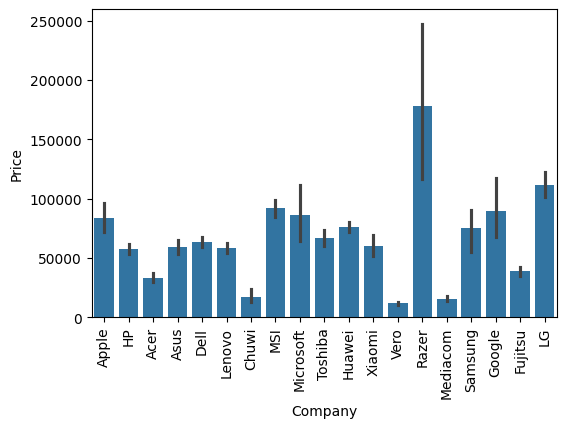

In [7]:
plt.figure(figsize=(6,4))
sns.barplot(x=df["Company"],y=df["Price"])
plt.xticks(rotation=90)
plt.show()

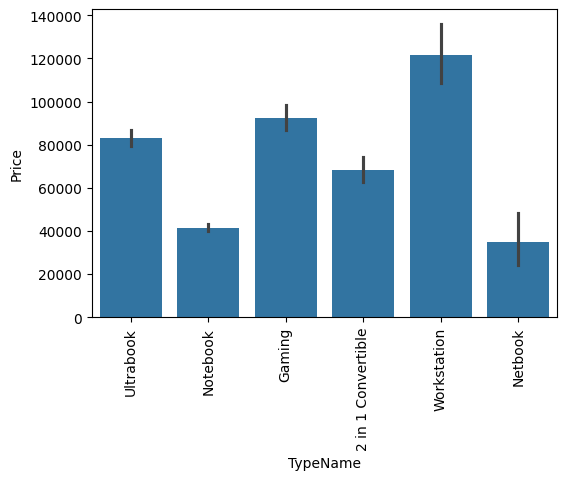

In [8]:
plt.figure(figsize=(6,4))
sns.barplot(x=df["TypeName"],y=df["Price"])
plt.xticks(rotation=90)
plt.show()

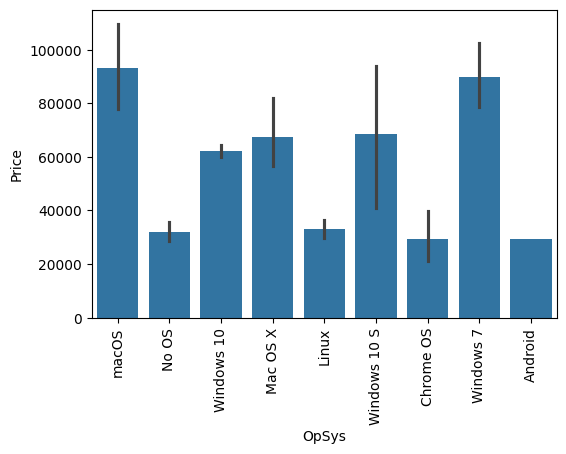

In [9]:
plt.figure(figsize=(6,4))
sns.barplot(x=df["OpSys"],y=df["Price"])
plt.xticks(rotation=90)
plt.show()

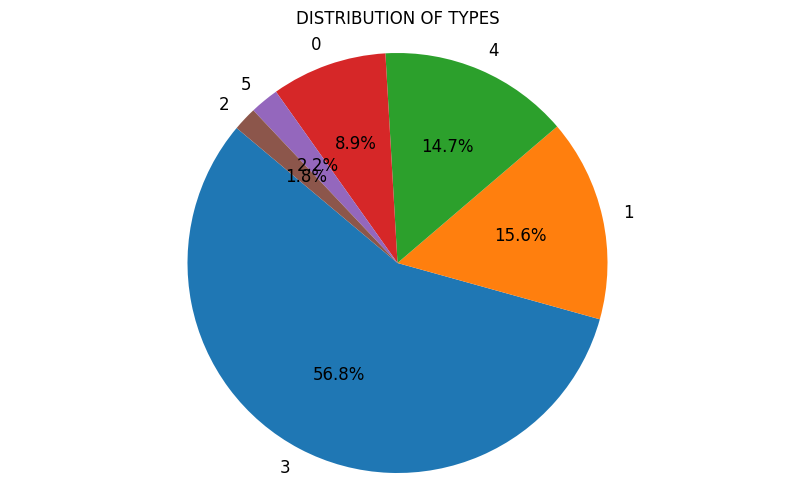

In [80]:
type_counts = df['TypeName'].value_counts()
plt.figure(figsize=(10,6))
plt.pie(type_counts, labels=type_counts.index,autopct='%1.1f%%',startangle = 140,textprops={'fontsize': 12})
plt.axis('equal')
plt.title("DISTRIBUTION OF TYPES")
plt.show()


In [10]:
df["Inches"].value_counts()

15.6    640
14      192
17.3    162
13.3    161
12.5     38
11.6     31
12        6
13.9      6
13.5      5
12.3      5
15.4      4
15        4
35.6      3
10.1      3
24        2
13        2
18.4      1
27.3      1
33.5      1
?         1
31.6      1
17        1
14.1      1
11.3      1
25.6      1
Name: Inches, dtype: int64

In [11]:
df["Inches"].replace('?',np.nan,inplace=True)
df["Weight"].replace('?',np.nan,inplace=True)
df["Memory"].replace('?',np.nan,inplace=True)

**DATA PREPROCESSING**

In [12]:
df.isnull().sum()

Company             30
TypeName            30
Inches              31
ScreenResolution    30
Cpu                 30
Ram                 30
Memory              31
Gpu                 30
OpSys               30
Weight              31
Price               30
dtype: int64

In [13]:
mod=df["Company"].mode()[0]

In [14]:
df["Company"]=df["Company"].fillna(mod)

In [15]:
df["TypeName"]=df["TypeName"].fillna(df["TypeName"].mode()[0])

In [16]:
df["Inches"]=df["Inches"].fillna(df["Inches"].mode()[0])

In [17]:
df["ScreenResolution"]=df["ScreenResolution"].fillna(df["ScreenResolution"].mode()[0])

In [18]:
df["Cpu"]=df["Cpu"].fillna(df["Cpu"].mode()[0])

In [19]:
df["Ram"]=df["Ram"].fillna(df["Ram"].mode()[0])

In [20]:
df["Memory"]=df["Memory"].fillna(df["Memory"].mode()[0])

In [21]:
df["Gpu"]=df["Gpu"].fillna(df["Gpu"].mode()[0])

In [22]:
df["OpSys"]=df["OpSys"].fillna(df["OpSys"].mode()[0])

In [23]:
df["Weight"]=df["Weight"].fillna(df["Weight"].mode()[0])

In [24]:
df["Price"]=df["Price"].fillna(df["Price"].median())

In [25]:
df["Price"].dtype

dtype('float64')

<Axes: ylabel='Price'>

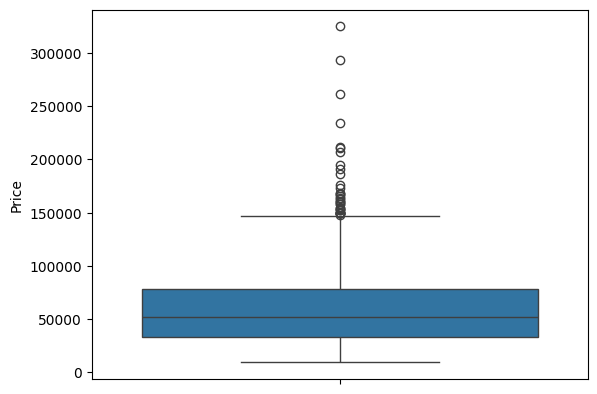

In [26]:
sns.boxplot(df["Price"])

In [27]:
df.isnull().sum()

Company             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price               0
dtype: int64

In [28]:
df.dtypes

Company              object
TypeName             object
Inches               object
ScreenResolution     object
Cpu                  object
Ram                  object
Memory               object
Gpu                  object
OpSys                object
Weight               object
Price               float64
dtype: object

In [29]:
df["Inches"].unique()

array(['13.3', '15.6', '15.4', '14', '12', '17.3', '13.5', '12.5', '13',
       '18.4', '13.9', '11.6', '25.6', '35.6', '12.3', '27.3', '24',
       '33.5', '31.6', '17', '15', '14.1', '11.3', '10.1'], dtype=object)

In [30]:
df.head()

Company   TypeName Inches                    ScreenResolution  \
0   Apple  Ultrabook   13.3  IPS Panel Retina Display 2560x1600   
1   Apple  Ultrabook   13.3                            1440x900   
2      HP   Notebook   15.6                   Full HD 1920x1080   
3   Apple  Ultrabook   15.4  IPS Panel Retina Display 2880x1800   
4   Apple  Ultrabook   13.3  IPS Panel Retina Display 2560x1600   

                          Cpu   Ram               Memory  \
0        Intel Core i5 2.3GHz   8GB            128GB SSD   
1        Intel Core i5 1.8GHz   8GB  128GB Flash Storage   
2  Intel Core i5 7200U 2.5GHz   8GB            256GB SSD   
3        Intel Core i7 2.7GHz  16GB            512GB SSD   
4        Intel Core i5 3.1GHz   8GB            256GB SSD   

                            Gpu  OpSys  Weight        Price  
0  Intel Iris Plus Graphics 640  macOS  1.37kg   71378.6832  
1        Intel HD Graphics 6000  macOS  1.34kg   47895.5232  
2         Intel HD Graphics 620  No OS  1.86kg   30636.0000  
3            AMD Radeon Pro 455  macOS  1.83kg  135195.3360  
4  Intel Iris Plus Graphics 650  macOS  1.37kg   96095.8080

In [31]:
df["Inches"] = pd.to_numeric(df["Inches"], errors="coerce")

In [32]:
df.head()

Company   TypeName  Inches                    ScreenResolution  \
0   Apple  Ultrabook    13.3  IPS Panel Retina Display 2560x1600   
1   Apple  Ultrabook    13.3                            1440x900   
2      HP   Notebook    15.6                   Full HD 1920x1080   
3   Apple  Ultrabook    15.4  IPS Panel Retina Display 2880x1800   
4   Apple  Ultrabook    13.3  IPS Panel Retina Display 2560x1600   

                          Cpu   Ram               Memory  \
0        Intel Core i5 2.3GHz   8GB            128GB SSD   
1        Intel Core i5 1.8GHz   8GB  128GB Flash Storage   
2  Intel Core i5 7200U 2.5GHz   8GB            256GB SSD   
3        Intel Core i7 2.7GHz  16GB            512GB SSD   
4        Intel Core i5 3.1GHz   8GB            256GB SSD   

                            Gpu  OpSys  Weight        Price  
0  Intel Iris Plus Graphics 640  macOS  1.37kg   71378.6832  
1        Intel HD Graphics 6000  macOS  1.34kg   47895.5232  
2         Intel HD Graphics 620  No OS  1.86kg   30636.0000  
3            AMD Radeon Pro 455  macOS  1.83kg  135195.3360  
4  Intel Iris Plus Graphics 650  macOS  1.37kg   96095.8080

In [33]:
df["new_weights"]=df["Weight"].str.extract(r"(\d+)")
df.drop(columns=["Weight"],inplace=True)


In [34]:
df["new_weights"] = pd.to_numeric(df["new_weights"], errors="coerce")

In [35]:
df["new_weights"].dtype

dtype('int64')

In [36]:
df["Ram"]=df["Ram"].str.replace("GB", "")
df["Ram"]=df["Ram"].astype('int32')
df["Ram"].dtype

dtype('int32')

In [37]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [38]:
df["Company"]=le.fit_transform(df["Company"])
df["TypeName"]=le.fit_transform(df["TypeName"])
df["ScreenResolution"]=le.fit_transform(df["ScreenResolution"])
df["Cpu"]=le.fit_transform(df["Cpu"])
df["Gpu"]=le.fit_transform(df["Gpu"])
df["OpSys"]=le.fit_transform(df["OpSys"])
df["Memory"]=le.fit_transform(df["Memory"])



In [39]:
df.head()

Company  TypeName  Inches  ScreenResolution  Cpu  Ram  Memory  Gpu  OpSys  \
0        1         4    13.3                23   65    8       4   58      8   
1        1         4    13.3                 1   63    8       2   51      8   
2        7         3    15.6                 8   74    8      16   53      4   
3        1         4    15.4                25   85   16      29    9      8   
4        1         4    13.3                23   67    8      16   59      8   

         Price  new_weights  
0   71378.6832            1  
1   47895.5232            1  
2   30636.0000            1  
3  135195.3360            1  
4   96095.8080            1

In [40]:
df1=df.copy()
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
value=ss.fit_transform(df)

In [41]:
new_df=pd.DataFrame(value,columns=df.columns)

In [42]:
new_df.head()

Company  TypeName    Inches  ScreenResolution       Cpu       Ram  \
0 -1.349505  1.142810 -0.953598          1.779477 -0.474711 -0.082214   
1 -1.349505  1.142810 -0.953598         -1.055069 -0.554766 -0.082214   
2  0.117871  0.329993  0.237118         -0.153168 -0.114461 -0.082214   
3 -1.349505  1.142810  0.133578          2.037163  0.325843  1.372793   
4 -1.349505  1.142810 -0.953598          1.779477 -0.394656 -0.082214   

     Memory       Gpu     OpSys     Price  new_weights  
0 -1.560508  0.152326  3.112355  0.314392     -0.80621  
1 -1.813050 -0.174583  3.112355 -0.321939     -0.80621  
2 -0.045256 -0.081181 -0.799291 -0.789626     -0.80621  
3  1.596267 -2.136037  3.112355  2.043653     -0.80621  
4 -0.045256  0.199027  3.112355  0.984160     -0.80621

In [43]:
X=new_df.drop(columns=["Price"])
y=new_df['Price']

**--FEATURE SELECTION--**

In [44]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestRegressor

In [45]:
rfe = RFE(estimator=RandomForestRegressor(),n_features_to_select=5)
rfe.fit(X,y)

RFE(estimator=RandomForestRegressor(), n_features_to_select=5)

In [46]:
for i, col in zip(range(X.shape[1]),X.columns):
  print(f"{col} selected={rfe.support_[i]} rank{rfe.ranking_[i]}")

Company selected=False rank3
TypeName selected=True rank1
Inches selected=False rank2
ScreenResolution selected=True rank1
Cpu selected=True rank1
Ram selected=True rank1
Memory selected=False rank4
Gpu selected=True rank1
OpSys selected=False rank6
new_weights selected=False rank5


**--MODEL DEVELOPMENT--**

In [47]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2, random_state=0)


In [48]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()

In [49]:
lr.fit(x_train,y_train)

LinearRegression()

In [50]:
ycap=lr.predict(x_test)

In [51]:
from sklearn import metrics

In [52]:
mse=metrics.mean_squared_error(y_test,ycap)

In [53]:
rmse=np.sqrt(mse)
print("ROOT MEAN SQUARED ERROR:",rmse)

ROOT MEAN SQUARED ERROR: 0.6846858889109795


In [54]:
r2=metrics.r2_score(y_test,ycap)

print("R2 SCORE:", r2)

R2 SCORE: 0.6165556872741935


In [55]:
df.shape

(1303, 11)

In [56]:
n=1303

In [57]:
a=(1-r2)*(1303-1)
b=1303-10-1
c=a/b
1-c
print("ADJESTED R2_SCORE",1-c)

ADJESTED R2_SCORE 0.6135878520363777


In [58]:
df1.head()

Company  TypeName  Inches  ScreenResolution  Cpu  Ram  Memory  Gpu  OpSys  \
0        1         4    13.3                23   65    8       4   58      8   
1        1         4    13.3                 1   63    8       2   51      8   
2        7         3    15.6                 8   74    8      16   53      4   
3        1         4    15.4                25   85   16      29    9      8   
4        1         4    13.3                23   67    8      16   59      8   

         Price  new_weights  
0   71378.6832            1  
1   47895.5232            1  
2   30636.0000            1  
3  135195.3360            1  
4   96095.8080            1

In [59]:
x=df1.drop(columns=["Price"])
y=df1["Price"]
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [60]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor()
rf.fit(x_train,y_train)

RandomForestRegressor()

In [61]:
ycap=rf.predict(x_test)

In [62]:
from sklearn import metrics
mse=metrics.mean_squared_error(y_test,ycap)
print("mean_squared_error_score",mse)

mean_squared_error_score 280554298.36286736


In [63]:
RMSE=np.sqrt(mse)
print("ROOT MEAN SQUARED ERROR:",RMSE)

ROOT MEAN SQUARED ERROR: 16749.755173221707


In [64]:
r2score=metrics.r2_score(y_test,ycap)

In [65]:
a=(1-r2score)*(1303-1)
b=1303-10-1
c=a/b



In [66]:
adjested_r=1-c
print("ADJESTED R2 SCORE:",adjested_r)


ADJESTED R2 SCORE: 0.8015538493227322


In [67]:
X=new_df.drop(columns=["Price"])
y=new_df['Price']

In [68]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2, random_state=0)

In [69]:
from sklearn.neighbors import KNeighborsRegressor
knn= KNeighborsRegressor()
knn.fit(X_train,y_train)

KNeighborsRegressor()

In [70]:
ycap=knn.predict(x_train)

In [71]:
y_test

580    -1.058162
1017    2.665258
761     1.064144
686    -0.735326
186     1.840879
          ...   
1176   -0.428689
549     0.876457
922    -0.206352
399     2.170053
44     -0.177477
Name: Price, Length: 261, dtype: float64

In [72]:
from sklearn import metrics
mse=metrics.mean_squared_error(y_train,ycap)
print("MEAN SQUARED ERROR:",mse)

MEAN SQUARED ERROR: 6.39699530744853


In [73]:
rmse=np.sqrt(mse)
print("ROOT MEAN SQUARED ERROR:",rmse)

ROOT MEAN SQUARED ERROR: 2.5292282039089575


In [74]:
r2_score=metrics.r2_score(y_train,ycap)
print(r2_score)

-5.8321872859929655


In [75]:
a=(1-r2_score)*(1303-1)
b=1303-10-1
c=a/b

In [76]:
adjested_r_knn=1-c
print("ADJESTED R2 SCORE:",adjested_r_knn)


ADJESTED R2 SCORE: -5.885067992540899
